# TP1 - Fouquerand / Montaut 

## I) Données artificielles et réelles 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd

**QUESTION 1.1**

In [2]:
def gen_linear_basic(a,b,eps,nbex):
    e = eps*rd.randn(nbex)
    x = rd.uniform(-5,5,nbex)
    y = a*x+b+e
    return (x,y)

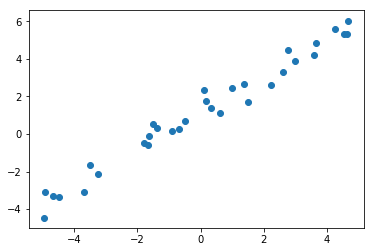

In [3]:
x,y = gen_linear_basic(1,1,0.5,32)

plt.scatter(x,y)
plt.show()

In [4]:
def gen_linear(a,b,eps,nbex):
    e = eps*rd.randn(nbex)
    x = rd.rand(nbex,len(a))*10-5
    y = np.dot(x,np.array(a))+b+e
    return (x,y)

In [5]:
x,y = gen_linear([1,1,1],5,0.5,32)
#print(x)
#print(y)

**QUESTION 1.2**

In [6]:
def read_file (fn):
    with open (fn) as f :
        names = f.readline()
        X = np.array ([[float(x) for x in l.strip().split(" ")] for l in f.readlines()])
    return X [:,:-1] , X [:, -1].reshape (-1)

In [7]:
f = read_file("housing.csv")

X = f[0] # housing inputs
Y = f[1] # housing outputs

In [8]:
#A.mean pour la moyenne
#A.std pour l'écart type

In [9]:
T = []
for i in range(13):
    T.append(X[:,i]) 

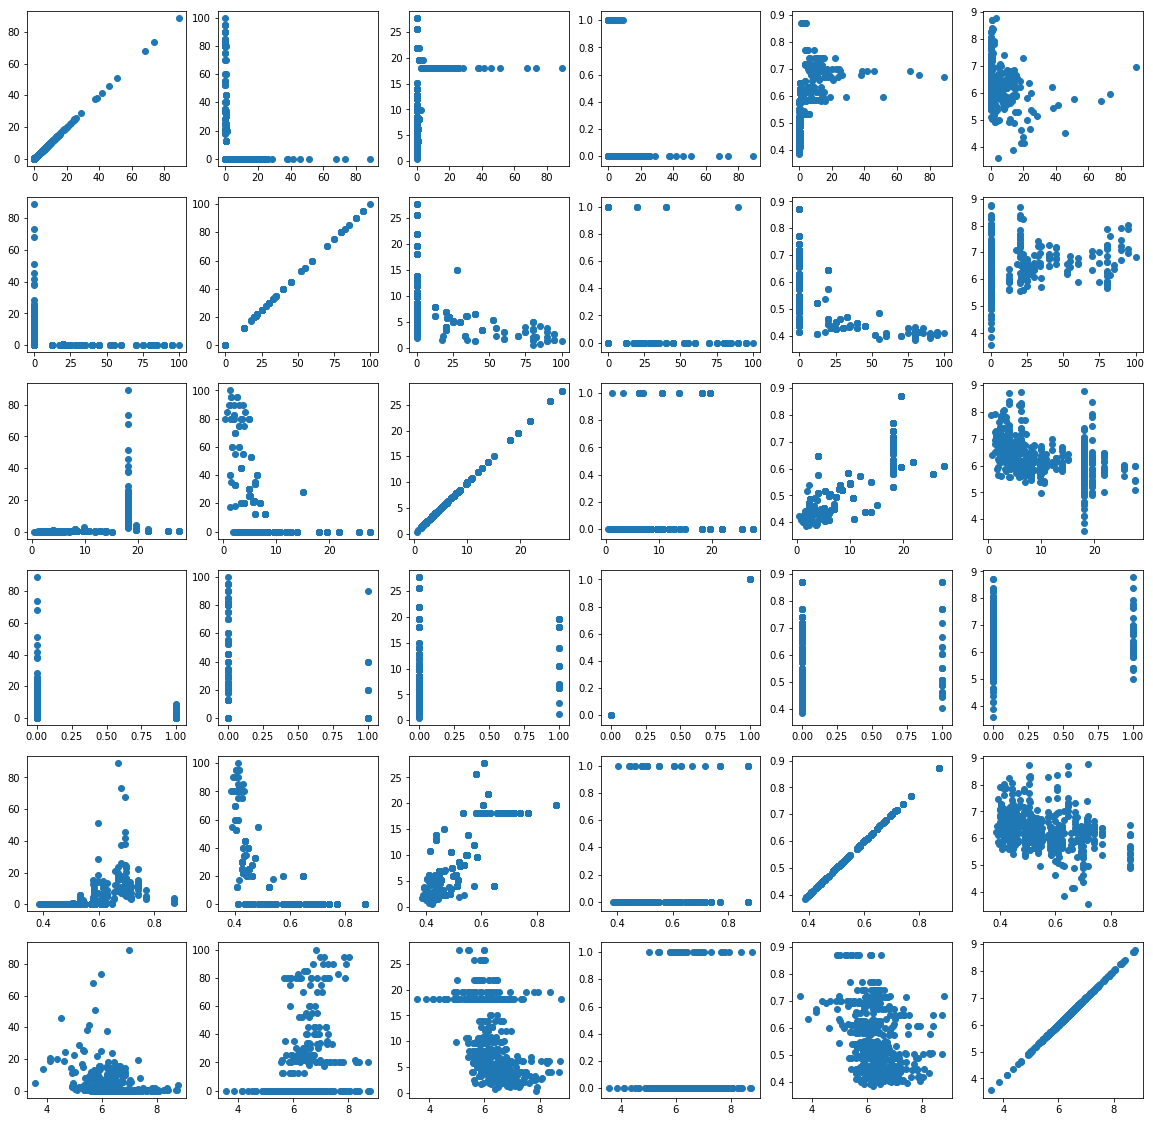

In [10]:
plt.figure(figsize=(20,20))
k = 1
for i in range(6):
    for j in range(6):
        plt.subplot(6,6,k)
        plt.scatter(T[i],T[j])
        k+=1
        
plt.show()

Il y a peu de corrélation sur les données. Ne pas se méprendre, les diagonales représentent les covariances de X[:,i] avec elle même.

## II) Régression linéaire

### II) 1. Préambule

**QUESTION 2.1**

$$f_w(x) = w.\tilde{x} \textrm{ avec } \tilde{x} = (1,x)$$
<br>
$$\textrm{Forme matricielle : }Y = f_w(X) = \tilde{X}*w \textrm{ avec } \tilde{X} = (1,X) \textrm{ où 1 est le vecteur colonne avec des 1}$$
<br>
$$\textrm{MSE = }\frac{1}{2n}*||Y - \tilde{Y}||² \textrm{ avec n le nombre de données}$$

In [11]:
def predict(w,X):
    #0 is the position, 1 is the value of the vector we add
    #axis=1 means we want to add a column vetor (0 would be a row vector)
    X_tilde = np.insert(X,0,1,axis=1) 
    return np.dot(w,X_tilde.transpose())

In [12]:
def mse(yhat, y):
    return np.mean((y-yhat)**2)


In [13]:
def regress(X,Y):
    X_tilde = np.insert(X,0,1,axis=1) 
    return np.linalg.pinv(np.dot(X_tilde.T,X_tilde)).dot(X_tilde.T).dot(Y)

**QUESTION 2.2.1**

In [14]:
def laComplete(e,nbex):
    w_known = [5,1,1,1]
    X,Y = gen_linear([1,1,1],5,e,nbex)
    w = regress(X,Y)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    error_w = mse(w,w_known)
    return (w,yhat,error,error_w)

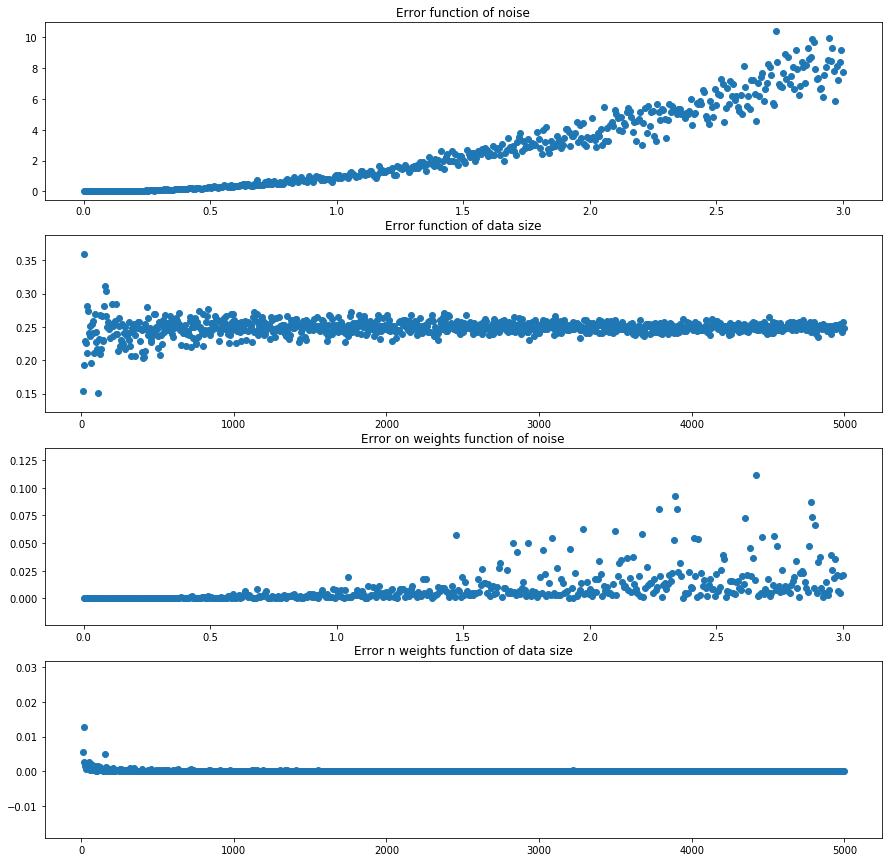

In [15]:
e = np.linspace(0,3,500)
nbex = range(10,5000,5) #generates an array

def testComplet():
    error_esp = [laComplete(esp,100)[2] for esp in e]
    error_n = [laComplete(0.5,n)[2] for n in nbex]
    error_w_esp = [laComplete(esp,100)[3] for esp in e]
    error_w_n = [laComplete(0.5,n)[3] for n in nbex]
    return(error_esp,error_n,error_w_esp,error_w_n)
    
error_esp,error_n,error_w_esp,error_w_n = testComplet()

plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
plt.scatter(e,error_esp)
plt.title('Error function of noise')
plt.subplot(4,1,2)
plt.scatter(nbex,error_n)
plt.title('Error function of data size')
plt.subplot(4,1,3)
plt.scatter(e,error_w_esp)
plt.title('Error on weights function of noise')
plt.subplot(4,1,4)
plt.scatter(nbex,error_w_n)
plt.title('Error n weights function of data size')
plt.show()

L'erreur en fonction du bruit augmente lorsque la variance du bruit augmente.<br>
L'erreur en fonction de la quantité de données converge.<br>
<br>
L'erreur sur les coefficients augmente lorsque la variance augmente.<br>
Enfin, l'erreur sur les coefficients tend vers 0 lorsque le nombre de données augmente.

**QUESTION 2.2.2**

Ici, on rajoute des dimensions supplémentaire correspondant à des poids nuls.

In [16]:
def laSavoyarde(e,nbex):
    w_known = [5,0,0,0,1,1,1]
    X,Y = gen_linear([0,0,0,1,1,1],5,e,nbex)
    w = regress(X,Y)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    error_w = mse(w,w_known)
    return (w,yhat,error,error_w)

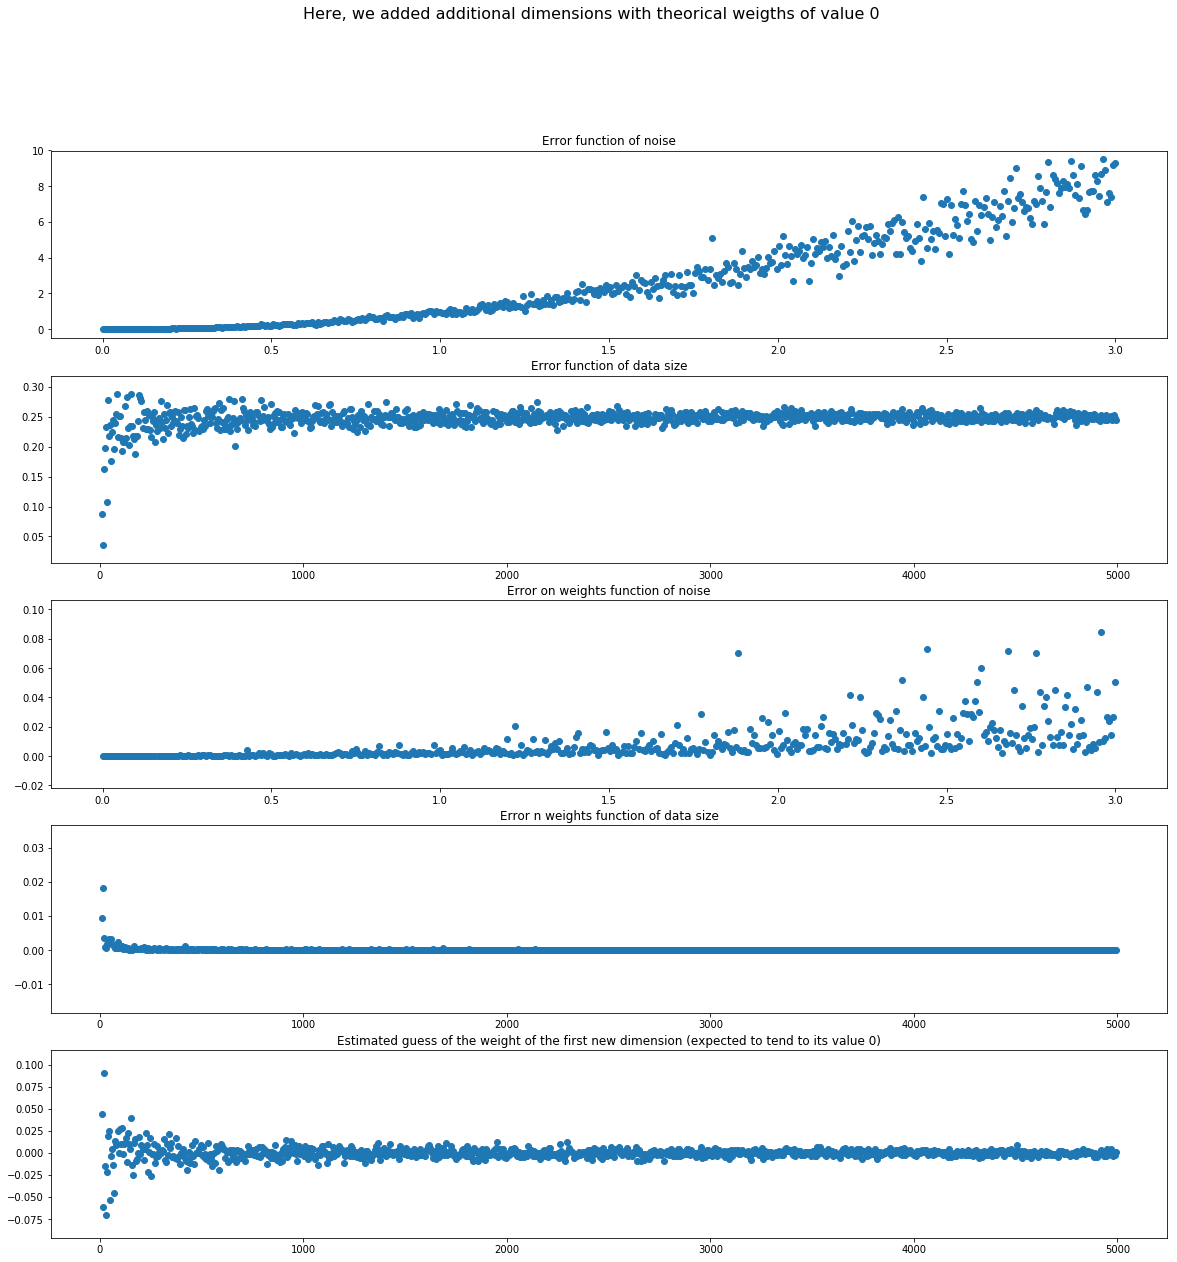

In [17]:
e = np.linspace(0,3,500)
nbex = range(10,5000,5) #generates an array

def testSavoyard():
    error_esp = [laSavoyarde(esp,100)[2] for esp in e]
    error_n = [laSavoyarde(0.5,n)[2] for n in nbex]
    error_w_esp = [laSavoyarde(esp,100)[3] for esp in e]
    error_w_n = [laSavoyarde(0.5,n)[3] for n in nbex]
    w_n = [laSavoyarde(0.5,n)[0][1] for n in nbex]
    return(error_esp,error_n,error_w_esp,error_w_n,w_n)

error_esp,error_n,error_w_esp,error_w_n,w_n = testSavoyard()

plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
plt.scatter(e,error_esp)
plt.title('Error function of noise')
plt.subplot(5,1,2)
plt.scatter(nbex,error_n)
plt.title('Error function of data size')
plt.subplot(5,1,3)
plt.scatter(e,error_w_esp)
plt.title('Error on weights function of noise')
plt.subplot(5,1,4)
plt.scatter(nbex,error_w_n)
plt.title('Error n weights function of data size')
plt.subplot(5,1,5)
plt.scatter(nbex,w_n)
plt.title('Estimated guess of the weight of the first new dimension (expected to tend to its value 0)')
plt.suptitle('Here, we added additional dimensions with theorical weigths of value 0',
             fontsize=16)
plt.show()


### II.2) Données réelles

**QUESTION 2.3.1**

In [18]:
f = read_file("housing.csv")

In [19]:
def laCowboy() : 
    X = f[0].copy() # housing inputs
    Y = f[1].copy() # housing outputs
    w = regress(X,Y)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    return (w,yhat,error)

In [20]:
what,yhat,error=(laCowboy())
print ("erreur : ", error)
print ("coefficients : " , what)

erreur :  21.8948311817
coefficients :  [  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e+00  -1.77666112e+01   3.80986521e+00   6.92224641e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]


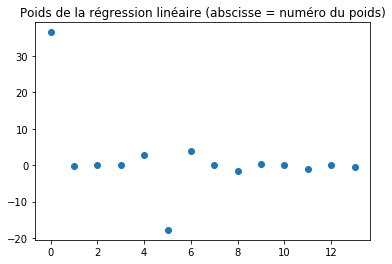

In [21]:
plt.scatter(range(len(what)),what)
plt.title("Poids de la régression linéaire (abscisse = numéro du poids)")
plt.show()

Pour ce qui est de la prédiction d'un output, il y a deux critères majeurs.

**QUESTION 2.3.2**
<br>
Ensuite on multiplie par 10 une des dimensions : 

In [22]:
def laWestern() : 
    X = f[0].copy() # housing inputs
    Y = f[1].copy() # housing outputs
    
    dimension = 3 #Dimension qu'on multiplie par 10
    for i in range (len(f[0])):
        X[i][dimension] *= 10
    
    w = regress(X,Y)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    return (w,yhat,error)

In [23]:
what,yhat,error=(laWestern())
print ("erreur : ", error)
print ("coefficients : " , what)

erreur :  21.8948311817
coefficients :  [  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e-01  -1.77666112e+01   3.80986521e+00   6.92224640e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]


Conclusion : on voit que la multiplication de la valeur d'une dimension des données change la valeur du poids de cette même dimension, mais pas la valeur de l'erreur. En l'occurence une multiplication des données par 10 divise par 10 le poids de la dimension correspondante. 
<br>
Il est donc necessaire de supprimer les facteurs de multiplication entre les différents critères.<br>
On peut faire cela en normalisant et en centrant les données.

*Pré-traitement des données : *

In [24]:
def normalisation(X):
    for i in range(len(X[0])):
        mx = np.array([abs(X[j][i]) for j in range(len(X))]).max()
        mean = np.array([abs(X[j][i]) for j in range(len(X))]).mean()
        for j in range(len(X)):
            X[j][i]-=mean/2
            X[j][i]/=max(mx,0.0001)
    return(X)

In [25]:
def lAndalouse() : 
    X = f[0].copy() # housing inputs
    Y = f[1].copy() # housing outputs
    X = normalisation(X)
    
    w = regress(X,Y)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    return (w,yhat,error)

erreur :  21.8948311817
coefficients :  [ 29.49614735  -9.61044018   4.64204584   0.5702963    2.68673382
 -15.47471838  33.45061652   0.06922246 -17.89346135   7.3451875
  -8.76989627 -20.9604391    3.69580709 -19.92507561]


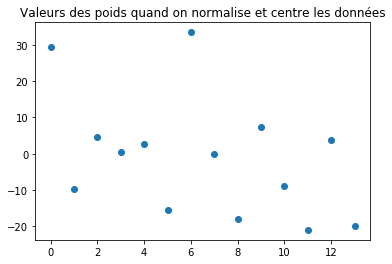

In [26]:
what,yhat,error=(lAndalouse())
print ("erreur : ", error)
print ("coefficients : " , what)


plt.scatter(range(len(what)),what)
plt.title("Valeurs des poids quand on normalise et centre les données")
plt.show()

**QUESTION 2.3.3**

Ici, on découpe les données en données de train et de test.

In [27]:
#Exemple de découpage des données
n = (len(f[0])//4)*3

X_train = f[0][0:n]
Y_train = f[1][0:n]

X_test = f[0][n:]
Y_test = f[1][n:]

In [28]:
def laProvencale(n) :
    X_train = f[0][0:n]
    Y_train = f[1][0:n]

    X_test = f[0][n:]
    Y_test = f[1][n:]

    w = regress(X_train,Y_train)
    yhat = predict(w,X_test)
    error = mse(yhat,Y_test)
    return (w,yhat,error)

In [29]:
N = [(len(f[0])*(i+1))//100 for i in range(99)]
E = [laProvencale(N[i])[2] for i in range(len(N))]

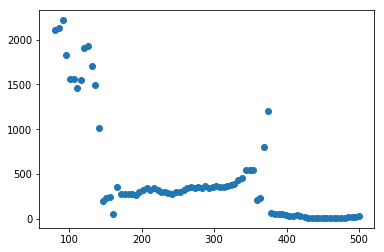

Taille maximale du set de training :  506


In [30]:
plt.scatter(N[15:],E[15:])
plt.show("Erreur sur les données de test en fonction de la taille du set de training")
plt.show()
print("Taille maximale du set de training : ",len(f[0]))

## III) Ridge Redgression

**QUESTION 3.1**

Le problème qui peut survenir est le sur-apprentissage des données d'entrainement. Ces données ne représentant pas la réalité, quand confronté à la réalité, le modèle échoue.<br>
Cela se produit quand on a pas assez d'observations, ou trop d'observations qui se ressemblent, donc au final pas assez d'observations représentatives de la réalité.

La représentation matricielle de la ridge régression devient : $$ w_{ridge} = (X^{t}X+λI)^{−1}X^{t}Y $$ 

In [31]:
def regress_ridge (X, Y, lam) :
    X_tilde = np.insert(X,0,1,axis=1) 
    return np.linalg.pinv(np.dot(X_tilde.T,X_tilde) + lam*np.identity(len(X_tilde[0]))).dot(X_tilde.T).dot(Y)

**QUESTION 3.2**

In [32]:
def laComplete_ridge(e,nbex,lam):
    w_known = [5,1,1,1]
    X,Y = gen_linear([1,1,1],5,e,nbex)
    w = regress_ridge(X,Y,lam)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    return (w,yhat,error)

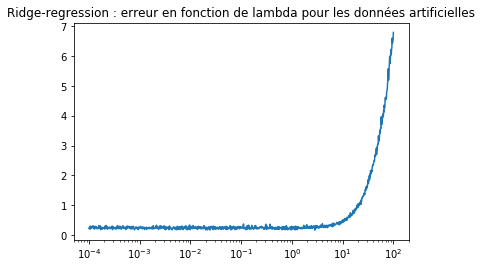

In [33]:
lam = np.logspace(-4,2,1000) #generates an array

def testComplet_ridge():
    error_lam = [laComplete_ridge(0.5,100,l)[2] for l in lam]
    return(error_lam)
    
error_lam = testComplet_ridge()

plt.plot(lam,error_lam)
plt.xscale("log")
plt.title("Ridge-regression : erreur en fonction de lambda pour les données artificielles")
plt.show()

Au delà de 10, l'erreur en fonction de lambda explose.

**QUESTION 3.3**

On travaille là sur les données **réelles**.

In [34]:
def laCowboy_ridge(lam) : 
    X = f[0].copy() # housing inputs
    Y = f[1].copy() # housing outputs
    
    w = regress_ridge(X,Y,lam)
    yhat = predict(w,X)
    error = mse(yhat,Y)
    return (w,yhat,error)

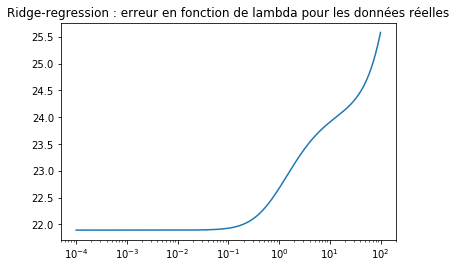

In [35]:
lam = np.logspace(-4,2,1000) #generates an array

def testCowboy_ridge():
    error_lam = [laCowboy_ridge(l)[2] for l in lam]
    return(error_lam)
    
error_lam = testCowboy_ridge()

plt.plot(lam,error_lam)
plt.xscale("log")
plt.title("Ridge-regression : erreur en fonction de lambda pour les données réelles")
plt.show()

## IV) Lasso

In [36]:
from sklearn.linear_model import Lasso

In [37]:
n = (len(f[0])//4)*3
X_train = f[0][0:n]
X_train = normalisation(X_train)
Y_train = f[1][0:n]

X_test = f[0][n:]
X_test = normalisation(X_test)
Y_test = f[1][n:]

lam = np.logspace(-4,3,1000) #generates an array
clf = [Lasso(alpha = l) for l in lam]
yhat = []
what = []

for c in clf:
    c.fit(X_train,Y_train)
    yhat.append(c.predict(X_test)) #On prédit le y avec le Lasso
    what.append(c.coef_) #On récupère w

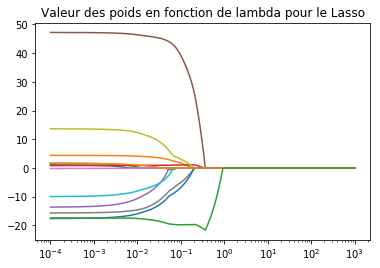

In [38]:
plt.figure()
for i in range(len(what[0])):
    plt.plot(lam,[what[j][i] for j in range(len(what))])
    
plt.xscale("log")
plt.title("Valeur des poids en fonction de lambda pour le Lasso")
plt.show()

Lorsque lambda est trop petit, c'est comme si on faisait une régression linéaire normale (partie II). Quand lambda est trop grand, on supprime tous les w en les rendant nuls. Il faut donc un lambda intermédiaire pour selectionner les w pertinents.

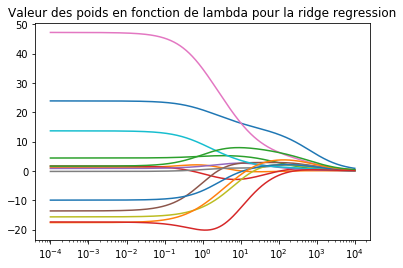

In [39]:
lam = np.logspace(-4,4,1000) #generates an array
what = [regress_ridge(X_train, Y_train, l) for l in lam]
plt.figure()
for i in range(len(what[0])):
    plt.plot(lam,[what[j][i] for j in range(len(what))])
    
plt.xscale("log")
plt.title("Valeur des poids en fonction de lambda pour la ridge regression")
plt.show()

On remarque ici qu'il est plus difficile de choisir lambda pour selectionner les w pertinents. En effet, à mesure que lambda augmente, les w tendent vers 0 "en même temps". C'est à dire que si ils ont une plus grande importance, cette importance est gommée à mesure que lambda augmente.

**QUESTION 4.2**

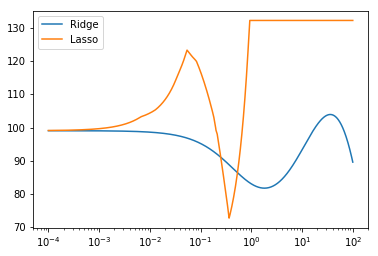

In [40]:
lam = np.logspace(-4,2,1000)
X_train = f[0][0:n]
Y_train = f[1][0:n]

X_test = f[0][n:]
Y_test = f[1][n:]

error_ridge = []
error_lasso = []

for l in lam :
    what_ridge = regress_ridge(X_train,Y_train,l)
    yhat_ridge = predict(what_ridge,X_test)
    error_ridge.append(mse(yhat_ridge,Y_test))
    
    clf = Lasso(alpha = l)
    clf.fit(X_train,Y_train)
    yhat_lasso = clf.predict(X_test)
    error_lasso.append(mse(yhat_lasso,Y_test))

plt.figure()
plt.plot(lam,error_ridge,label = "Ridge")
plt.plot(lam,error_lasso, label = "Lasso")
plt.xscale("log")
plt.legend()
plt.show()

Remarque : les régressions Ridge et Lasso nous donnent des valeurs de la MSE supérieures à celles de la regression OLS, et ce quelque soit la valeur de lambda, ce qui nous semble étrange. Nous nous attendions à avoir une plus petite MSE...

## V) Classification plug-in

**QUESTION 5.1.1**

In [41]:
def load_usps (filename):
    with open (filename ,"r") as f :
        f.readline ()
        data =[ [ float (x) for x in l.split ()] for l in f if len (l.split ()) >2]
    tmp = np.array (data)
    return tmp [: ,1:],tmp [: ,0].astype(int)

def show_usps (data):
    plt.imshow (data.reshape((16 ,16)) , interpolation ="nearest", cmap ="gray")

In [42]:
f_train = load_usps('USPS/USPS_train.txt')
f_test = load_usps('USPS/USPS_test.txt')

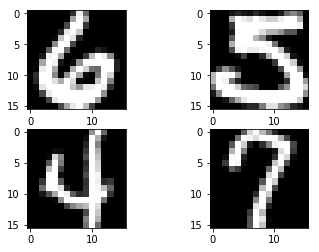

In [43]:
plt.figure()
plt.subplot(2,2,1)
show_usps(f_train[0][0])
plt.subplot(2,2,2)
show_usps(f_train[0][1])
plt.subplot(2,2,3)
show_usps(f_train[0][2])
plt.subplot(2,2,4)
show_usps(f_train[0][3])
plt.show()

**QUESTION 5.1.2**

On garde la fonction regress pour calculer les w, mais on change la fonction predict.

In [44]:
def predict_classif(w,X):
    X_tilde = np.insert(X,0,1,axis=1) 
    return np.sign(np.dot(w,X_tilde.transpose()))

In [45]:
def laForestiere(): 
    X_train = f_train[0].copy() # image inputs
    Y_train = f_train[1].copy() # image outputs
    
    X_test = f_test[0].copy()
    Y_test = f_test[1].copy()
    
    w = regress(X_train,Y_train)
    yhat = predict_classif(w,X_test)
    error = mse(yhat,Y_test)
    return (w,yhat,error)

In [46]:
print("Erreur de la classification plug-in : ", laForestiere()[2])

Erreur de la classification plug-in :  17.3298455406


Le TP parle de classification binaire, ce qui nous semble étrange ici... En effet, les output sont des chiffres entre 0 et 9.